Integrantes:


*   Renzo Alberto Carrasco Calle
*   Franklin Quispe Garcés
*   Armando  Vargas Custodio
*   Marco Coronel

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

# Procesamiento y tratamiento de los datos

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/clientes.csv', sep=";")

In [5]:
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
data.shape

(999, 12)

In [7]:
columnas=["Id","Score","Estado","Genero","Edad","Patrimonio","Saldo","Productos","TieneTarjCredito","Activo","Salario","Retirado"]

In [8]:
data.columns=columnas

In [9]:
data.head(10)

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,M,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


In [10]:
data["Salario"]

0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 999, dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                999 non-null    int64  
 1   Score             999 non-null    int64  
 2   Estado            999 non-null    object 
 3   Genero            991 non-null    object 
 4   Edad              999 non-null    int64  
 5   Patrimonio        999 non-null    int64  
 6   Saldo             999 non-null    int64  
 7   Productos         999 non-null    int64  
 8   TieneTarjCredito  999 non-null    int64  
 9   Activo            999 non-null    int64  
 10  Salario           992 non-null    float64
 11  Retirado          999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [12]:
data_test=data.copy()
data_test.dropna(inplace=True)
data_test

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [13]:
#Verificamos que ya no hay datos nulos
data_test.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              0
Edad                0
Patrimonio          0
Saldo               0
Productos           0
TieneTarjCredito    0
Activo              0
Salario             0
Retirado            0
dtype: int64

In [14]:
#Verificamos que no hay datos duplicados
data_test.duplicated().sum()  #Hay un dato duplicado

1

In [15]:
data_test[data_test.duplicated()]

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [17]:
data_test[75:85]

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
78,79,757,SC,Masculino,33,5,7725322,1,0,1,19423963.0,0
79,80,416,PR,Feminino,41,10,12218966,2,1,0,9830161.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
82,84,543,RS,Feminino,36,3,0,2,0,0,2601959.0,0
83,85,506,RS,Feminino,34,4,9030762,1,1,1,15923529.0,0
85,87,652,SC,Feminino,75,10,0,2,1,1,11467575.0,0
86,88,750,SC,Masculino,22,3,12168182,1,1,0,12864335.0,1
87,89,729,RS,Masculino,30,9,0,2,1,0,15186935.0,0
88,90,646,RS,Feminino,46,4,0,3,1,0,9325142.0,1
89,91,635,PR,Feminino,28,3,8162367,2,1,1,15679136.0,0


In [16]:
data_test.drop_duplicates(keep='first', inplace=True)
data_test

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [18]:
#Verificamos que no hay datos duplicados
data_test.duplicated().sum()  #Hay un dato duplicado

0

In [19]:
data_test.groupby(["Genero"]).size()

Genero
F              2
Fem            1
Feminino     455
M              6
Masculino    519
dtype: int64

In [20]:
data_test['Genero'] = data_test['Genero'].map({'F':'Femenino',
                                       'Fem':'Femenino',
                                       'Feminino':'Femenino',
                                       "M":"Masculino",
                                      "Masculino":"Masculino"})
data_test

,Id,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,1,619,RS,Femenino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Femenino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Femenino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Femenino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Femenino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [21]:
data_test.groupby(["Genero"]).size()

Genero
Femenino     458
Masculino    525
dtype: int64

In [22]:
data_test=data_test.drop(columns="Id")
data_test

,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,619,RS,Femenino,42,2,0,1,1,1,10134888.0,1
1,608,SC,Femenino,41,1,8380786,1,0,1,11254258.0,0
2,502,RS,Femenino,42,8,1596608,3,1,0,11393157.0,1
3,699,RS,Femenino,39,1,0,2,0,0,9382663.0,0
4,850,SC,Femenino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [23]:
#Existen edades negativas e iguales a 0 
data_test.groupby('Edad').size()

Edad
-20     1
-10     1
 0      5
 18     1
 19     2
       ..
 75     2
 79     1
 80     1
 82     1
 140    1
Length: 64, dtype: int64

In [24]:
filtro=data_test['Edad']>0 

In [25]:
data_test=data_test[filtro]
data_test

,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,619,RS,Femenino,42,2,0,1,1,1,10134888.0,1
1,608,SC,Femenino,41,1,8380786,1,0,1,11254258.0,0
2,502,RS,Femenino,42,8,1596608,3,1,0,11393157.0,1
3,699,RS,Femenino,39,1,0,2,0,0,9382663.0,0
4,850,SC,Femenino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [26]:
filtro2=data_test['Edad']<110
data_test=data_test[filtro2]
data_test

,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
0,619,RS,Femenino,42,2,0,1,1,1,10134888.0,1
1,608,SC,Femenino,41,1,8380786,1,0,1,11254258.0,0
2,502,RS,Femenino,42,8,1596608,3,1,0,11393157.0,1
3,699,RS,Femenino,39,1,0,2,0,0,9382663.0,0
4,850,SC,Femenino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [33]:
#Excluimos salarios mayores a 1'000,000
filtro3=data_test['Salario']<1000000
data_test=data_test[filtro3]
data_test

,Score,Estado,Genero,Edad,Patrimonio,Saldo,Productos,TieneTarjCredito,Activo,Salario,Retirado
4,850,SC,Femenino,43,2,12551082,1,1,1,790841.0,0
6,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
8,501,RS,Masculino,44,4,14205107,2,0,1,749405.0,0
16,653,PR,Masculino,58,1,13260288,1,1,0,509767.0,1
23,669,RS,Masculino,46,3,0,2,0,1,848775.0,0
...,...,...,...,...,...,...,...,...,...,...,...
965,663,RS,Femenino,42,5,12462607,1,1,1,780045.0,0
975,750,SC,Femenino,36,8,11294007,1,0,1,985581.0,0
982,668,RS,Masculino,32,7,0,2,1,1,77737.0,0
997,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


# Análisis Exploratorio

In [27]:
tipos=data_test.columns.to_series().groupby(data_test.dtypes).groups
tipos

{int64: ['Score', 'Edad', 'Patrimonio', 'Saldo', 'Productos', 'TieneTarjCredito', 'Activo', 'Retirado'], float64: ['Salario'], object: ['Estado', 'Genero']}

In [28]:
col_num=tipos[np.dtype('int64')].to_list()
col_num

['Score',
 'Edad',
 'Patrimonio',
 'Saldo',
 'Productos',
 'TieneTarjCredito',
 'Activo',
 'Retirado']

In [29]:
col_num.append('Salario')
col_num

['Score',
 'Edad',
 'Patrimonio',
 'Saldo',
 'Productos',
 'TieneTarjCredito',
 'Activo',
 'Retirado',
 'Salario']

In [30]:
col_cat=tipos[np.dtype('object')].to_list()
col_cat

['Estado', 'Genero']

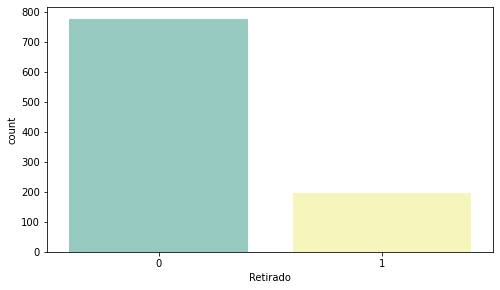

In [31]:
#Countplot for Retirado
plt.figure(figsize=(8,4.5))
sns.countplot(x=data_test["Retirado"],data=data_test, palette="Set3")
plt.show()

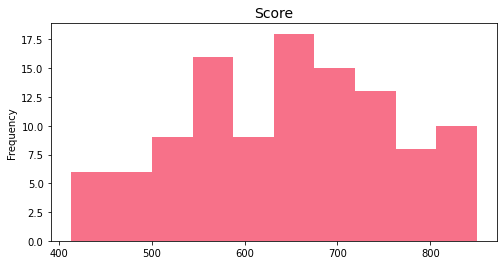

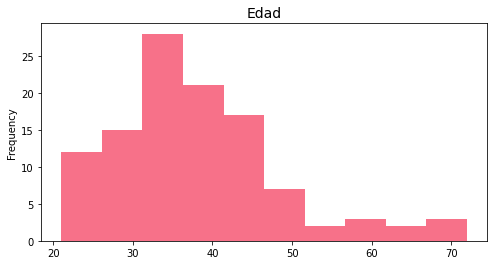

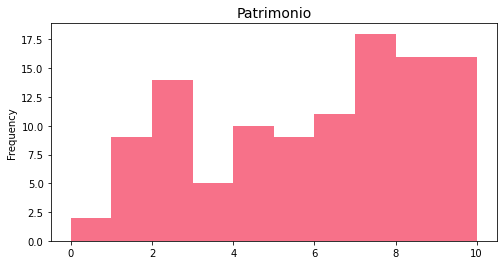

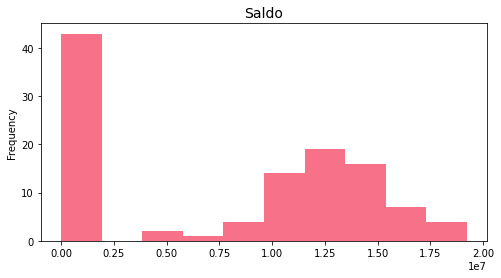

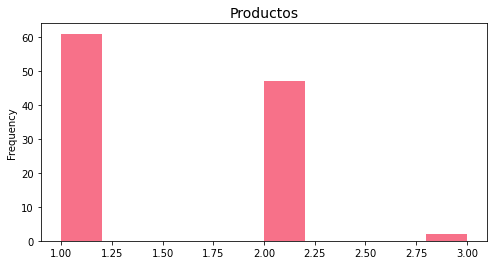

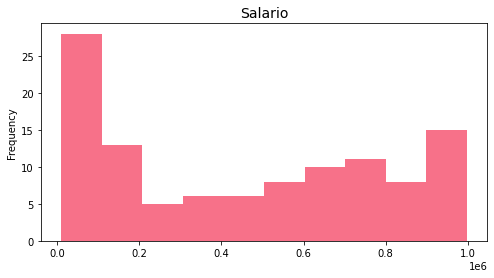

In [37]:
#Histogramas de las variables 

nbins=int(round(np.sqrt(len(data_test)),0))

def Histogram(dataset, columnName):
  if columnName not in ['TieneTarjCredito',	'Activo',	'Retirado']:
    dataset[columnName].plot.hist(bins=nbins,figsize=(8,4))
    plt.title(f"{columnName}",fontdict={'fontsize':14})
    plt.show()

for columnName in col_num:
  Histogram(data_test,columnName)

plt.show()

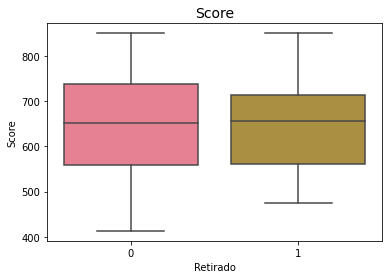

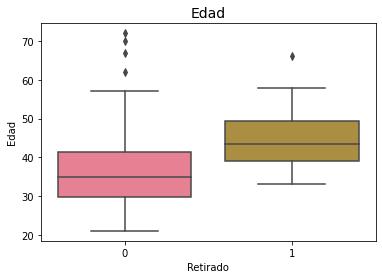

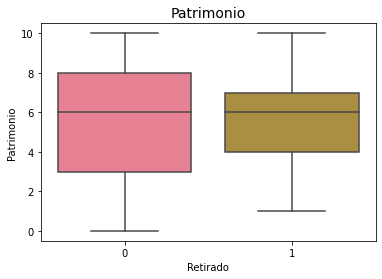

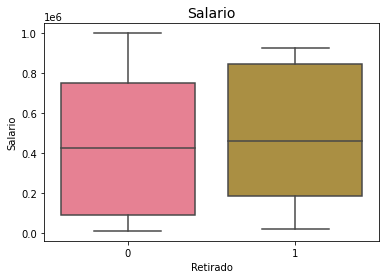

In [39]:
#Boxplots de las variables agrupadas por potabilidad
def boxPlotter(dataset, columnName):
  if columnName not in ['TieneTarjCredito',	'Activo',	'Saldo', 'Retirado','Productos']:
    sns.boxplot(x="Retirado", y=columnName, data=data_test,)
    plt.title(f"{columnName}",fontdict={'fontsize':14})
    plt.show()
  
for columnName in col_num:
  boxPlotter(data_test,columnName)

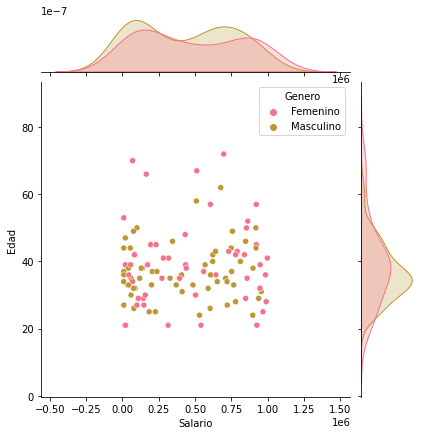

In [52]:
#Joint Plot 
sns.jointplot(data=data_test, x="Salario", y="Edad", hue="Genero")